# Tests with Geopandas
### Manuel Robalinho, em 15-9-2018

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
nybb_path = gpd.datasets.get_path('nybb')
nybb_path

'zip://C:\\ProgramData\\Anaconda3\\lib\\site-packages\\geopandas\\datasets\\nybb_16a.zip'

In [8]:
boros = gpd.read_file(nybb_path)
boros.set_index('BoroCode', inplace=True)

,BoroName,Shape_Leng,Shape_Area,geometry
BoroCode,,,,
5,Staten Island,330470.010332,1.623820e+09,(POLYGON ((970217.0223999023 145643.3322143555...
4,Queens,896344.047763,3.045213e+09,(POLYGON ((1029606.076599121 156073.8142089844...
3,Brooklyn,741080.523166,1.937479e+09,(POLYGON ((1021176.479003906 151374.7969970703...
1,Manhattan,359299.096471,6.364715e+08,(POLYGON ((981219.0557861328 188655.3157958984...
2,Bronx,464392.991824,1.186925e+09,(POLYGON ((1012821.805786133 229228.2645874023...


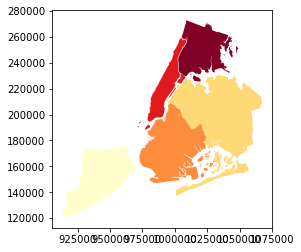

In [15]:
boros.plot(cmap='YlOrRd')

In [18]:
boros_x=boros['geometry'].convex_hull

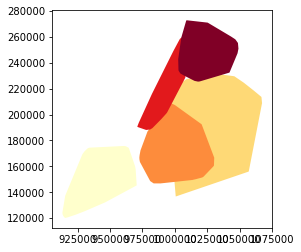

In [19]:
boros_x.plot(cmap='YlOrRd')

## With Portugal Map

In [9]:
path = 'ML/GeoPandas/Portugal/PRT_adm_shp/'

In [12]:
# Tables Portugal / Distritos / Concelhos
uf_pt1 = gpd.read_file(path + 'PRT_adm0.shp')
uf_pt2 = gpd.read_file(path + 'PRT_adm1.shp')
uf_pt3 = gpd.read_file(path + 'PRT_adm2.shp')

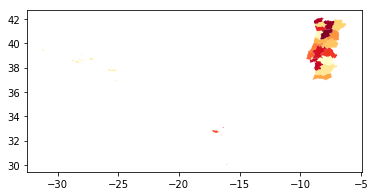

In [13]:
# Distritos
uf_pt2.plot(cmap='YlOrRd')

In [16]:
# Delete information about Autonomos Regions (Açores e Madeira)
uf_pt2x = uf_pt2[uf_pt2.TYPE_1 != 'Regiões autônoma']

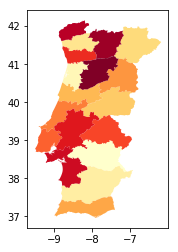

In [17]:
uf_pt2x.plot(cmap='YlOrRd')

In [20]:
uf_pt2x_x=uf_pt2x['geometry'].convex_hull

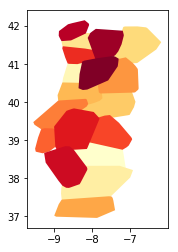

In [21]:
uf_pt2x_x.plot(cmap='YlOrRd')

In [22]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [27]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",0.000784
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,0.008618
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",0.005993
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,...",0.038408
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,0.014027


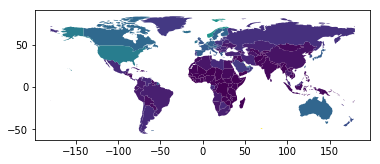

In [26]:
# Simply use the plot command with the column argument set to the column whose values you want used to assign colors.
#world = world[(world.pop_est>0) & (world.name!="Antarctica")]

world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

world.plot(column='gdp_per_cap')

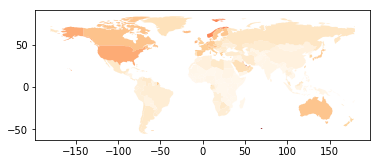

In [28]:
world.plot(column='gdp_per_cap', cmap='OrRd');

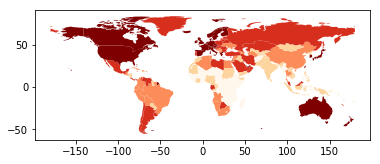

In [30]:
# The scheme option can be set to ‘equal_interval’, ‘quantiles’ or ‘percentiles’.
world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles')

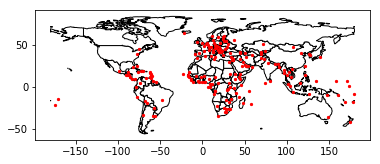

In [32]:
# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
fig, ax = plt.subplots()
ax.set_aspect('equal')
world.plot(ax=ax, color='white', edgecolor='black')
cities.plot(ax=ax, marker='o', color='red', markersize=5)

plt.show();

## London Maps

In [35]:
# Map of crime in 2016 - London
# 2016-01-metropolitan-street
# https://data.london.gov.uk/dataset/london-borough-profiles

path_london = 'ML/GeoPandas/London/'

In [38]:
# set the filepath and load in a shapefile
fp = path_london + 'London_Borough_Excluding_MHW.shp'
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.6 160201.8, 516407.3 160210.5..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.2 159504.7, 535005.5 159502, ..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.6 157530.4, 540361.2 157551.9..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.8 178100, 521967.7 178096.8, ..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.5 182881.6, 510249.9 182886, ..."


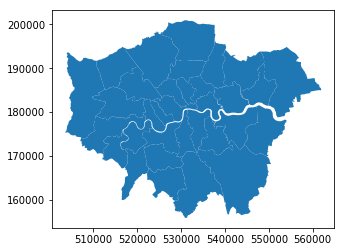

In [39]:
map_df.plot()

In [51]:
# Read Excel file
df = pd.read_excel(path_london + 'london-borough-profiles.xls')
df.head(10)

,Code,Area_name,Inner/_Outer_London,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015",...,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
0,E09000001,City of London,Inner London,8800,5326,290,30.3,43.2,11.4,73.1,...,6.0,5.6,NaN,2.6,129,.,.,.,.,.
1,E09000002,Barking and Dagenham,Outer London,209000,78188,"3,611",57.9,32.9,27.2,63.1,...,7.1,3.1,28.5,7.3,228,Lab,0,100,0,36.5
2,E09000003,Barnet,Outer London,389600,151423,"8,675",44.9,37.3,21.1,64.9,...,7.4,2.8,20.7,6.0,134,Cons,50.8,.,1.6,40.5
3,E09000004,Bexley,Outer London,244300,97736,"6,058",40.3,39.0,20.6,62.9,...,7.2,3.3,22.7,6.9,164,Cons,71.4,23.8,0,39.6
4,E09000005,Brent,Outer London,332100,121048,"4,323",76.8,35.6,20.9,67.8,...,7.2,2.9,24.3,7.9,169,Lab,9.5,88.9,1.6,36.3
5,E09000006,Bromley,Outer London,327900,140602,"15,013",21.8,40.2,19.9,62.6,...,7.4,3.3,16,5.2,148,Cons,85,11.7,0,40.8
6,E09000007,Camden,Inner London,242500,107654,"2,179",111.3,36.4,17.3,71.0,...,7.1,3.6,21.3,3.9,164,Lab,22.2,74.1,1.9,38.7
7,E09000008,Croydon,Outer London,386500,159010,"8,650",44.7,37.0,22.0,64.9,...,7.2,3.3,24.5,6.5,178,Lab,42.9,57.1,0,38.6
8,E09000009,Ealing,Outer London,351600,132663,"5,554",63.3,36.2,21.4,66.8,...,7.3,3.6,23.8,6.9,164,Lab,17.4,76.8,5.8,41.2
9,E09000010,Enfield,Outer London,333000,130328,"8,083",41.2,36.3,22.8,64.4,...,7.3,2.6,25.2,7.0,152,Lab,34.9,65.1,0,38.2


In [44]:
# Create Maps online
# https://app.datawrapper.de/map/EuqvD/basemap
# https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d


In [60]:
# Filter some columns from dataframe
df1 = df[['Area_name','GLA_Population_Estimate_2017', 'Population_density_(per_hectare)_2017', 'Mortality_rate_from_causes_considered_preventable_2012/14']]

In [61]:
df1.head()

,Area_name,GLA_Population_Estimate_2017,Population_density_(per_hectare)_2017,Mortality_rate_from_causes_considered_preventable_2012/14
0,City of London,8800,30.3,129
1,Barking and Dagenham,209000,57.9,228
2,Barnet,389600,44.9,134
3,Bexley,244300,40.3,164
4,Brent,332100,76.8,169


In [65]:
# Those are really terrible column names. Let’s rename them to something simpler.
# Rename columns
data_for_map = df1.rename(index=str, 
                          columns={ 'GLA_Population_Estimate_2017': 'GLA_Population',
                                    'Population_density_(per_hectare)_2017': 'Density_per_hectare',
                                    'Mortality_rate_from_causes_considered_preventable_2012/14': 'Mortality_rate'})
# check dat dataframe
data_for_map.head()

,Area_name,GLA_Population,Density_per_hectare,Mortality_rate
0,City of London,8800,30.3,129
1,Barking and Dagenham,209000,57.9,228
2,Barnet,389600,44.9,134
3,Bexley,244300,40.3,164
4,Brent,332100,76.8,169


In [67]:
# join the geodataframe with the cleaned up csv dataframe
merged = map_df.set_index('NAME').join(data_for_map.set_index('Area_name'))
merged.head()

,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,GLA_Population,Density_per_hectare,Mortality_rate
NAME,,,,,,,,,,
Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.6 160201.8, 516407.3 160210.5...",175400,47.1,141
Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.2 159504.7, 535005.5 159502, ...",386500,44.7,178
Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.6 157530.4, 540361.2 157551.9...",327900,21.8,148
Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.8 178100, 521967.7 178096.8, ...",274200,49,166
Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.5 182881.6, 510249.9 182886, ...",351600,63.3,164


# Map time!

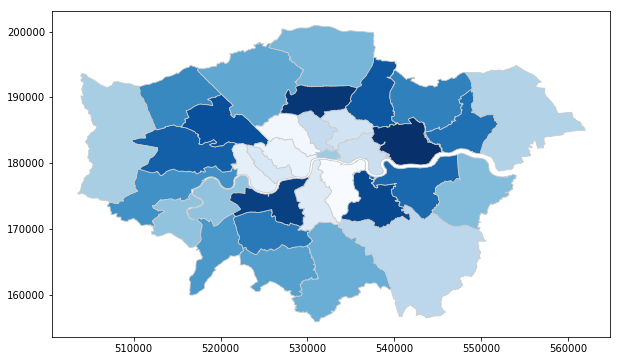

In [69]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Density_per_hectare'
# set the range for the choropleth
vmin, vmax = 120, 220
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

## Customising the map

In [73]:
# REMOVE THE AXIS
# ax.axis('off')

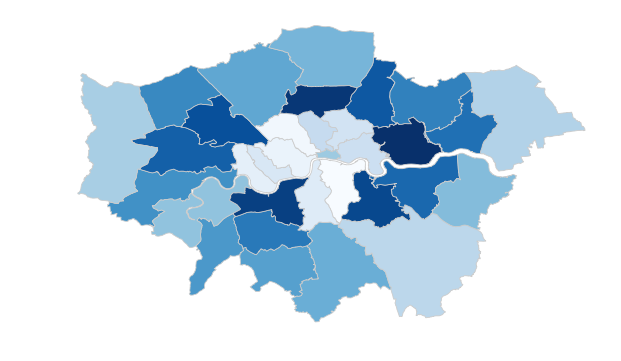

In [72]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Density_per_hectare'
# set the range for the choropleth
vmin, vmax = 120, 220
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
# remove the axis
ax.axis('off')
# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

In [80]:
# ADD A TITLE

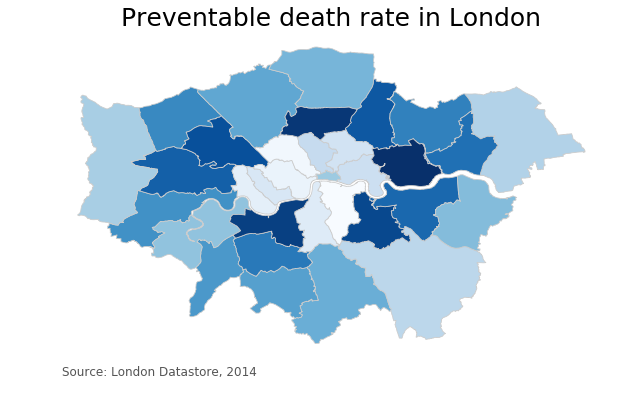

In [79]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Density_per_hectare'
# set the range for the choropleth
vmin, vmax = 120, 220
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
# remove the axis
ax.axis('off')

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# add a title
ax.set_title('Preventable death rate in London', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Source: London Datastore, 2014',xy=(0.1, .08),  xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

In [76]:
# Create colorbar as a legend

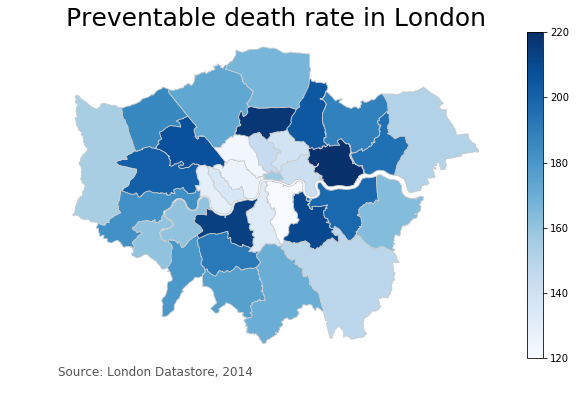

In [78]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Density_per_hectare'
# set the range for the choropleth
vmin, vmax = 120, 220
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
# remove the axis
ax.axis('off')

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# add a title
ax.set_title('Preventable death rate in London', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Source: London Datastore, 2014',xy=(0.1, .08),  xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

In [82]:
# Save figure
# The code below will save the figure as a png

In [84]:
fig.savefig('map_export.png', dpi=300)